<a href="https://colab.research.google.com/github/andrewdepriest/sp500_financials/blob/main/S%26P_500_Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

from datetime import datetime
end_time = datetime.now()
start_time = datetime(end_time.year - 1, end_time.month, end_time.day)

#Data Preprocessing

In [ ]:
finance_list = ['V','JPM','MA','BAC']

for stock in finance_list:
  globals()[stock] = yf.download(stock,start_time,end_time)

company_list = [V,JPM,MA,BAC]
company_name = ['VISA','JP MORGAN CHASE','MASTERCARD','BANK OF AMERICA']

for company, com_name in zip(company_list, company_name):
  company['company_name'] = com_name

df = pd.concat(company_list, axis=0)
df.head(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-03-16,215.169998,217.580002,208.759995,217.449997,215.757034,13674600,VISA
2023-03-17,214.869995,218.660004,214.869995,217.389999,215.697525,18801200,VISA
2023-03-20,217.000000,220.550003,216.839996,218.149994,216.451584,9817400,VISA
2023-03-21,221.339996,222.509995,218.679993,221.949997,220.222015,8971400,VISA
2023-03-22,222.500000,224.899994,219.919998,220.039993,218.326889,6700600,VISA
2023-03-23,220.440002,225.250000,220.259995,222.589996,220.857040,6427700,VISA
2023-03-24,220.669998,221.330002,218.250000,221.039993,219.319077,4791500,VISA
2023-03-27,222.589996,224.080002,221.389999,221.809998,220.083084,7210900,VISA
2023-03-28,222.820007,223.330002,218.649994,220.330002,218.614609,6418400,VISA


# Analysis

In [ ]:
df[df['company_name']=='VISA'].describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,244.983651,246.710833,243.364682,245.237024,244.270701,5.916305e+06
std,18.096065,18.023336,18.191338,18.124859,18.600684,2.413499e+06
min,214.869995,217.580002,208.759995,217.389999,215.697525,1.640900e+06
25%,231.332500,233.310005,229.622505,231.492500,230.356625,4.533300e+06
50%,240.000000,241.454994,238.489998,239.934998,238.979652,5.289600e+06
75%,257.352493,259.042488,256.399994,257.992508,257.512321,6.586350e+06
max,288.959991,289.040009,284.549988,286.410004,286.410004,2.046060e+07


In [ ]:
df[df['company_name']=='VISA'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-03-16 to 2024-03-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


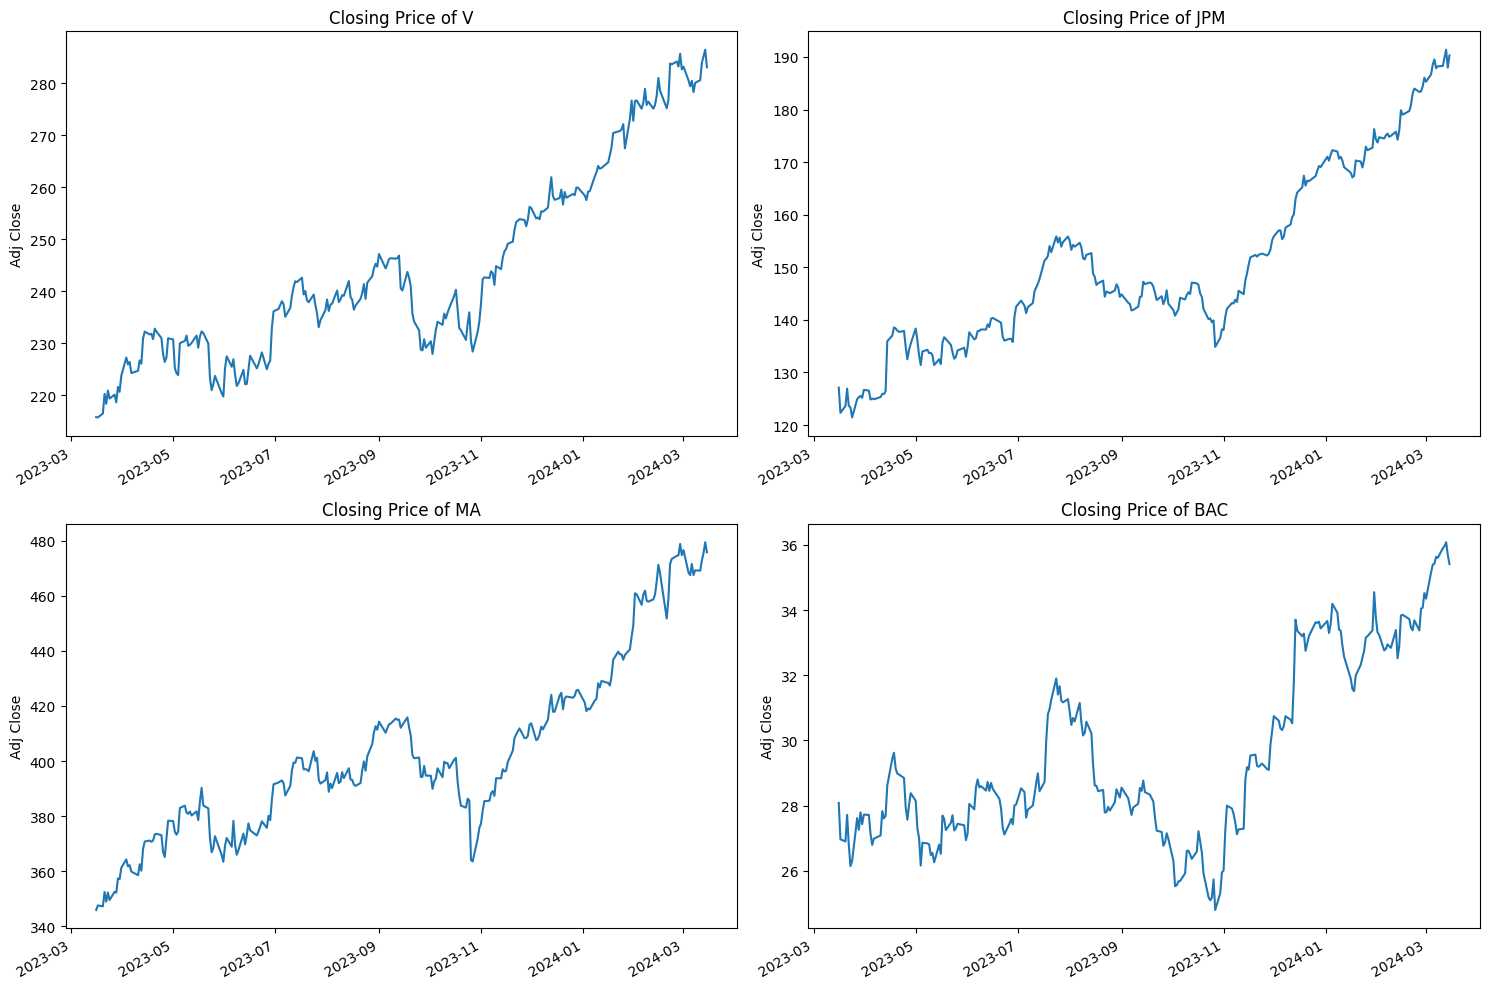

In [ ]:
#Closing Price
plt.figure(figsize=(15,10))
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f'Closing Price of {finance_list[i - 1]}')

plt.tight_layout()

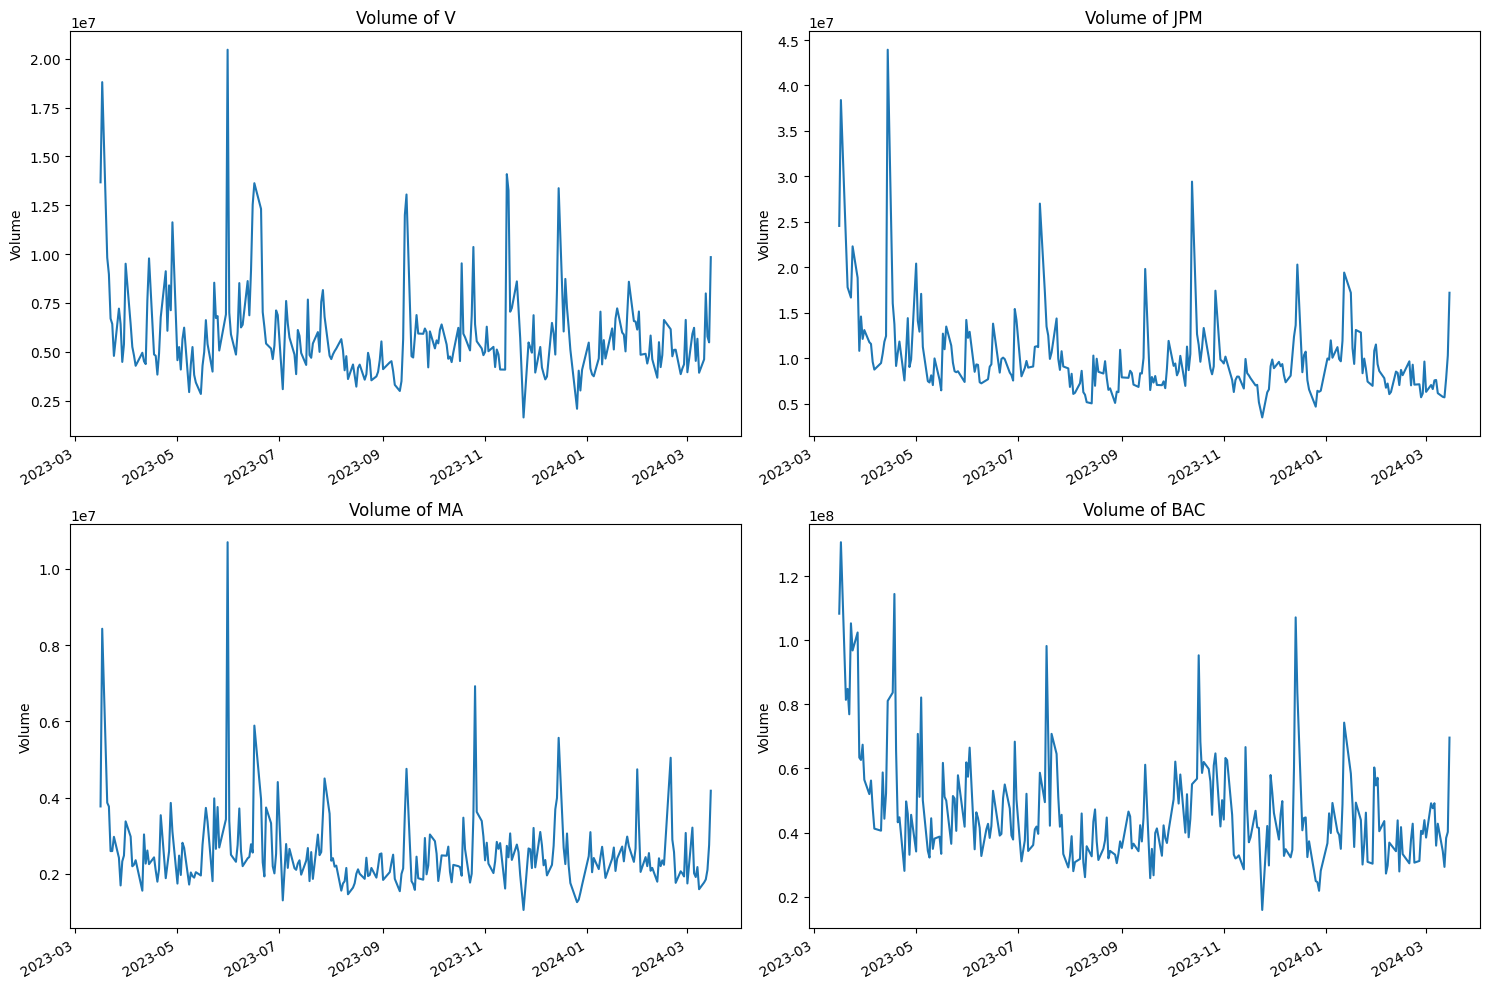

In [ ]:
#Trading Volume
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f'Volume of {finance_list[i - 1]}')

plt.tight_layout()

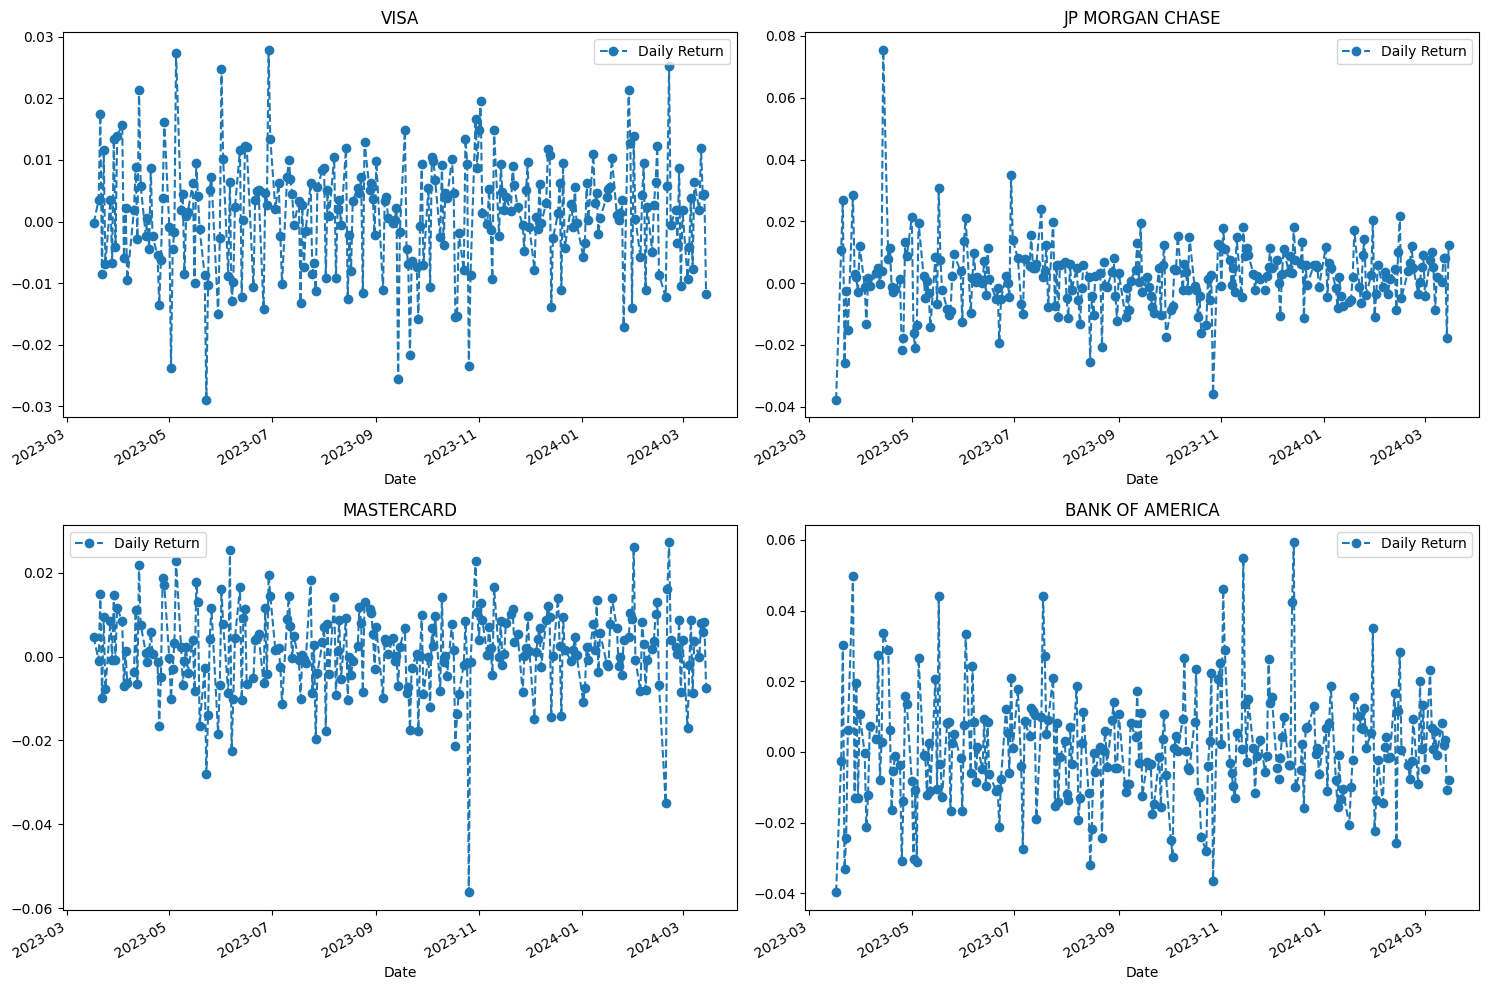

In [ ]:
#Daily Average Return of Stock
for company in company_list:
  company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

V['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('VISA')

JPM['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('JP MORGAN CHASE')

MA['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MASTERCARD')

BAC['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('BANK OF AMERICA')

fig.tight_layout()

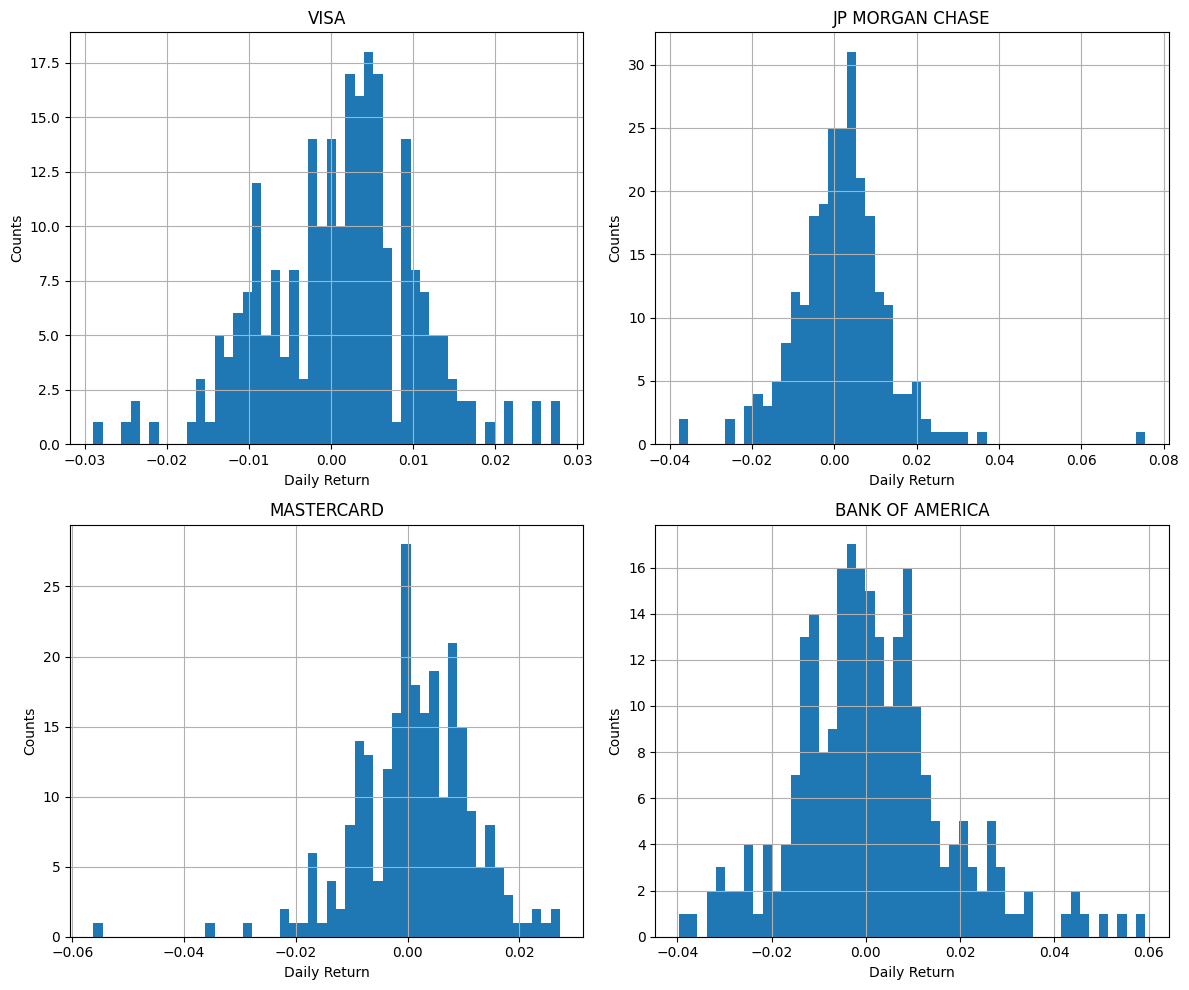

In [ ]:
#histogram of average daily return
plt.figure(figsize=(12,10))

for i, company in enumerate(company_list, 1):
  plt.subplot(2,2,i)
  company['Daily Return'].hist(bins=50)
  plt.xlabel('Daily Return')
  plt.ylabel('Counts')
  plt.title(f'{company_name[i-1]}')

plt.tight_layout()

In [ ]:
#correlation between closing prices
closing_df = pdr.get_data_yahoo(finance_list, start=start_time, end=end_time)['Adj Close']
finance_returns = closing_df.pct_change()
finance_returns.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,BAC,JPM,MA,V
Date,,,,
2023-03-16,NaN,NaN,NaN,NaN
2023-03-17,-0.039696,-0.037782,0.004770,-0.000276
2023-03-20,-0.002516,0.010571,-0.000972,0.003496
2023-03-21,0.030270,0.026821,0.015029,0.017419
2023-03-22,-0.033228,-0.025814,-0.009984,-0.008606


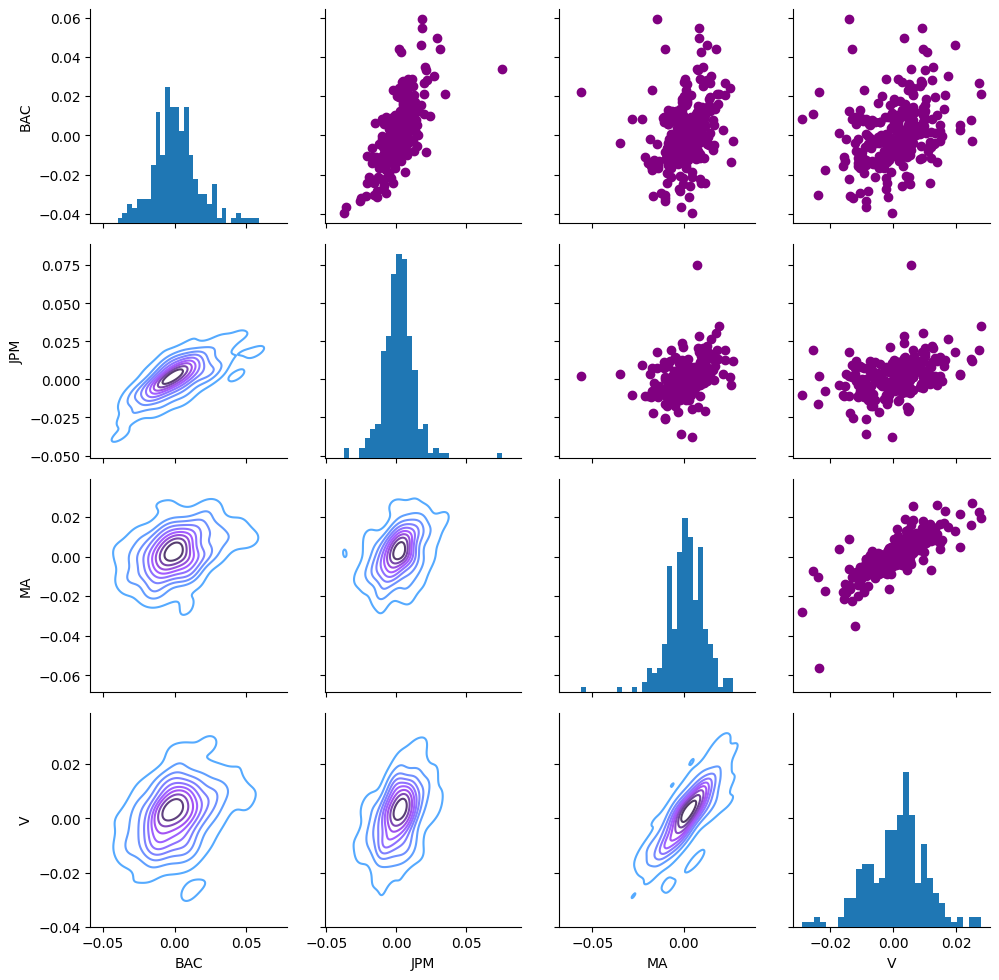

In [ ]:
return_fig = sns.PairGrid(finance_returns.dropna())

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

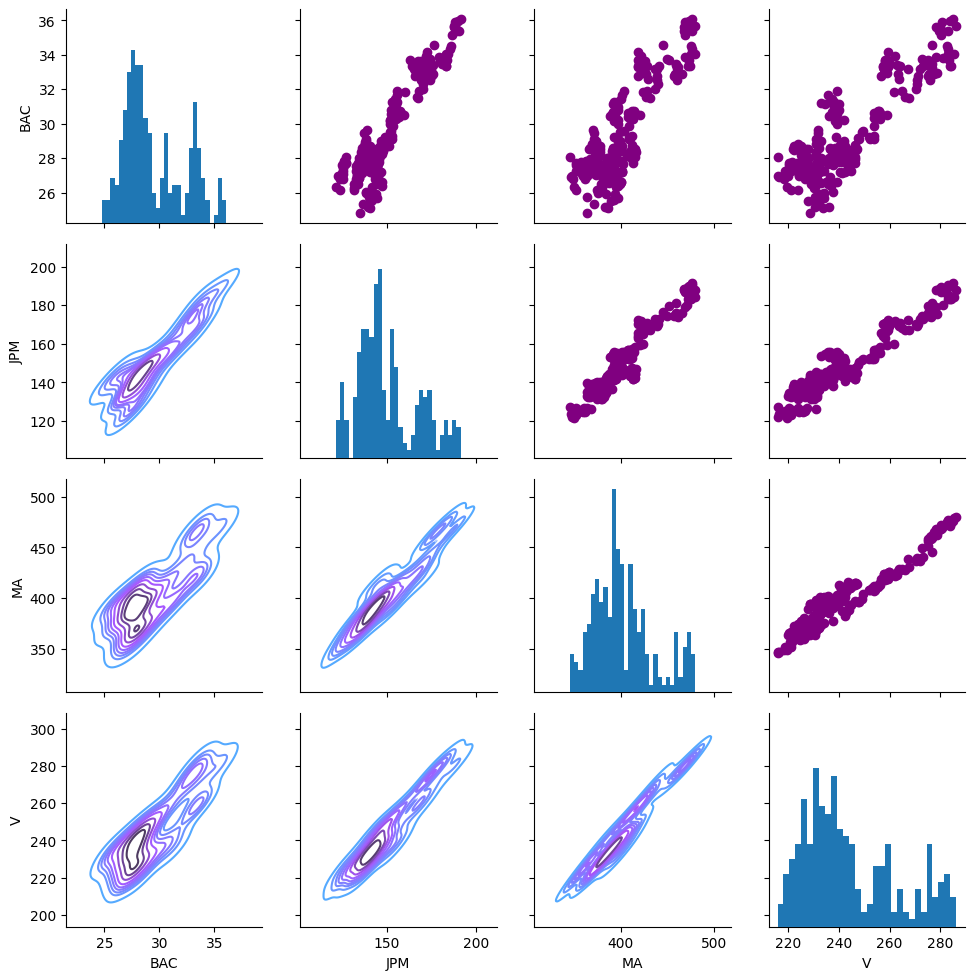

In [ ]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of Closing Price')

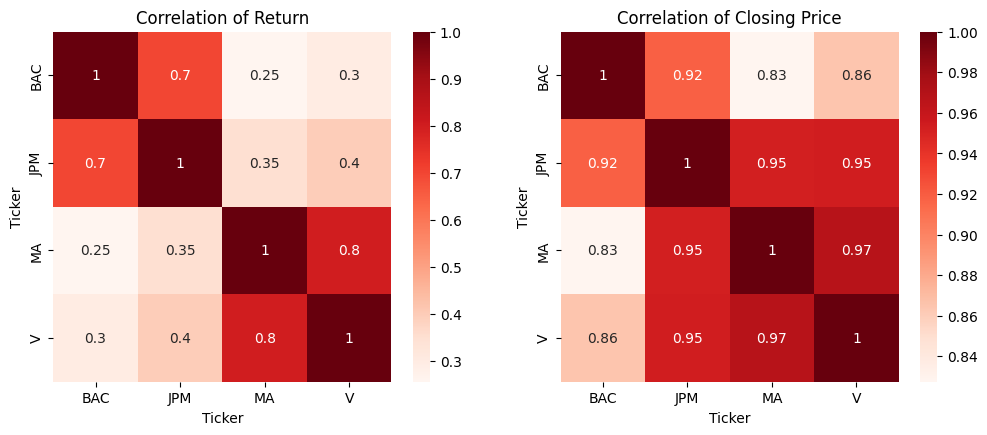

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(finance_returns.corr(), annot=True, cmap='Reds')
plt.title('Correlation of Return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='Reds')
plt.title('Correlation of Closing Price')

In [ ]:
#predicting closing price of individual stocks
df = pdr.get_data_yahoo(('V'),start='2014-01-01', end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,55.384998,55.507500,54.875000,55.252499,51.427002,10654000
2014-01-03,55.437500,55.622501,55.057499,55.290001,51.461922,7809600
2014-01-06,55.294998,55.577499,54.897499,54.957500,51.152439,8577600
2014-01-07,55.187500,55.527500,55.115002,55.377499,51.543354,8178000
2014-01-08,55.355000,55.750000,55.160000,55.555000,51.708561,8487200
...,...,...,...,...,...,...
2024-03-11,279.450012,280.769989,277.989990,280.559998,280.559998,4614000
2024-03-12,281.309998,284.480011,280.290009,283.920013,283.920013,7988700
2024-03-13,284.660004,286.100006,283.820007,285.140015,285.140015,5783800


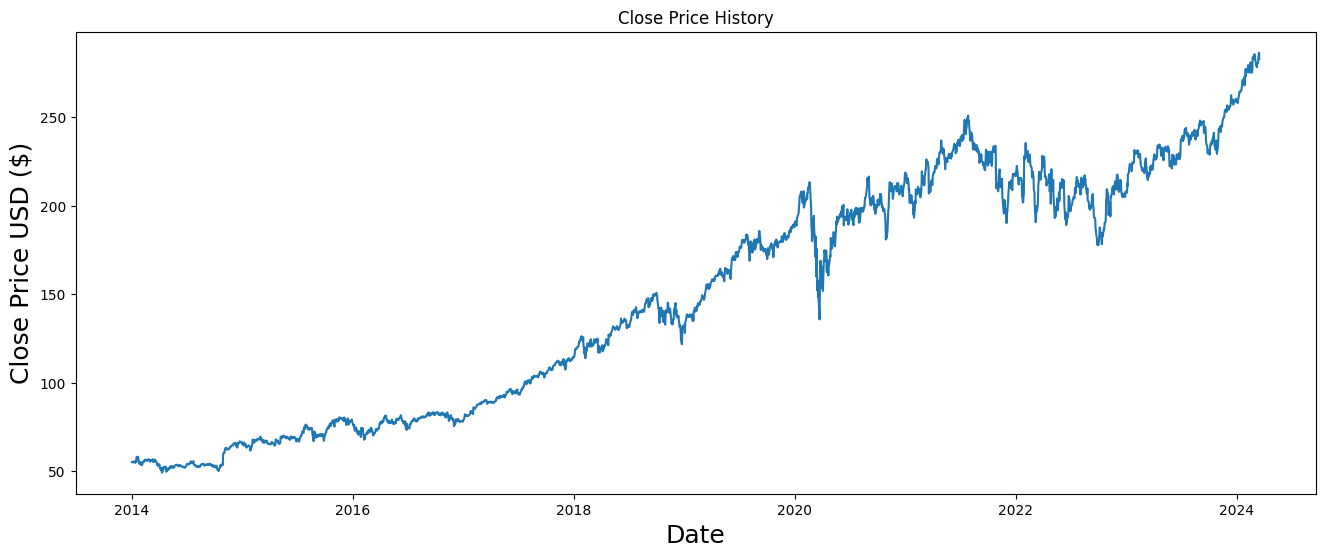

In [ ]:
#current closing price history
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values

train_data_len = int(np.ceil(len(dataset)*.95))
train_data_len

2440

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02568992],
       [0.02584799],
       [0.02444653],
       ...,
       [0.9946471 ],
       [1.        ],
       [0.98579574]])

In [ ]:
#training data
train_data = scaled_data[0:int(train_data_len),:]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.02568992, 0.02584799, 0.02444653, 0.02621678, 0.02696494,
       0.02663828, 0.02581638, 0.02346655, 0.02741803, 0.02858767,
       0.02649076, 0.03746008, 0.03719664, 0.03831361, 0.03331893,
       0.02594282, 0.02064256, 0.02563724, 0.02159091, 0.02555294,
       0.0198101 , 0.0177448 , 0.01887229, 0.01999978, 0.02358246,
       0.02650129, 0.02520521, 0.02708085, 0.02901971, 0.02889327,
       0.03094804, 0.03101126, 0.02871413, 0.02827157, 0.02816619,
       0.03114825, 0.03211768, 0.03106395, 0.03124308, 0.03088481,
       0.02614303, 0.03042117, 0.02758663, 0.02869305, 0.03048439,
       0.03042117, 0.03219143, 0.03105341, 0.02544756, 0.02543703,
       0.02860875, 0.03138007, 0.02865091, 0.02654345, 0.02817672,
       0.02541595, 0.02293968, 0.02007354, 0.02016839, 0.01629065])]
[0.020263216962577935]

[array([0.02568992, 0.02584799, 0.02444653, 0.02621678, 0.02696494,
       0.02663828, 0.02581638, 0.02346655, 0.02741803, 0.02858767,
       0.02649076, 0.03746008, 0.0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1,epochs=1)

2380/2380 [==============================] - 164s 65ms/step - loss: 0.0013


In [ ]:
test_data = scaled_data[train_data_len - 60:,:]
x_test = []
y_test = dataset[train_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

rmse = np.sqrt(np.mean(((pred - y_test)**2)))
rmse

4/4 [==============================] - 2s 45ms/step


8.761155853996398

<ipython-input-44-305cfa2d0195>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred


<function matplotlib.pyplot.show(close=None, block=None)>

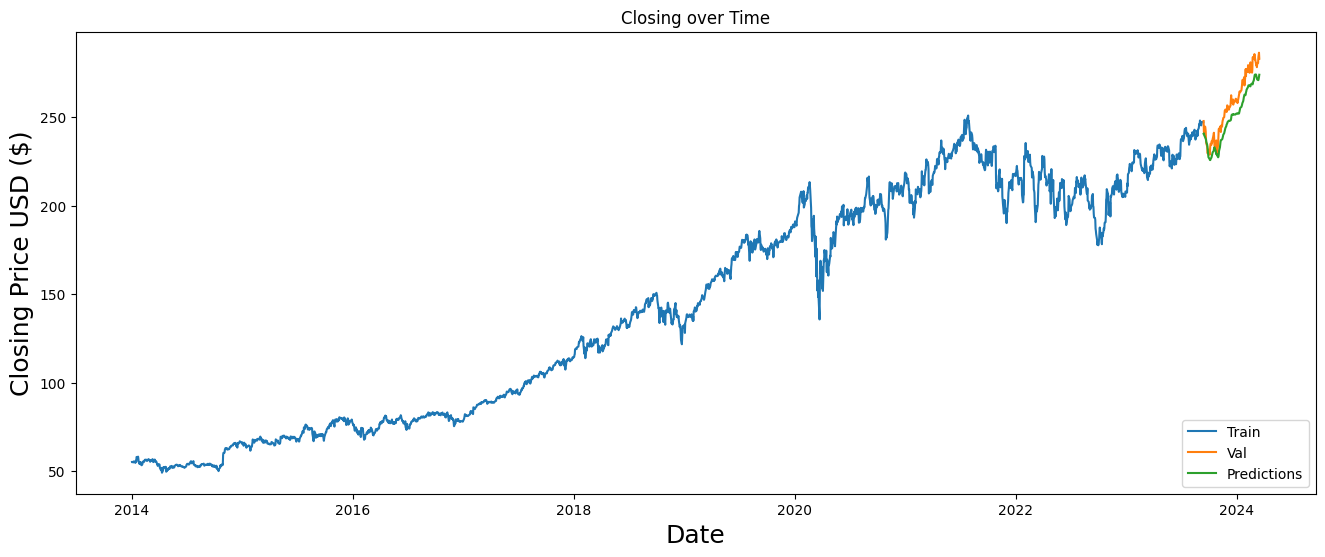

In [ ]:
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = pred

plt.figure(figsize=(16,6))
plt.title('Model')
plt.title('Closing over Time')
plt.ylabel('Closing Price USD ($)', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')

plt.show